## Natural Language Processing on Hindi Bible text

# Introduction
We will analyze Hindi Bible text of HHBD version from Bible Society of India (BSI) with NLP techniques. We will seek to perform sentiment analysis on all of the Bible books while also bringing to the surface some interesting findings like which is the most significant verse based on the occurrence of frequent words, Who wrote most of the New Testament, etc. Lastly, this notebook will serve as a walkthrough of how the [dataset](https://www.kaggle.com/kapilverma/hindi-bible) I created can be used.<br>
Just a word of caution before we start: It's a purely quantitative analysis and not a qualitative analysis. With this in mind, let's dive in.
#### Preprocessing of Data
The data was parsed from a JSON format to a CSV format. Most of the details like Book no., Chapter No. etc. were extracted from `Verseid` field in the JSON file and some details like "book names in Hindi" and "authors' names" were added from external sources. If you are interested to follow full process of data preprocessing please go through [this link](https://github.com/kapil-verma/NLP-on-Hindi-Text).
> I have hidden most of the code in this notebook if you wish to see the code of any section, just toggle the button `Code`.

In [1]:
# library imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
#Importing the String module
import string
from nltk import FreqDist
from nltk.corpus import stopwords
warnings.filterwarnings("ignore")
# printing list of files available to us
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hindi-bible/HSWN_WN.txt
/kaggle/input/hindi-bible/hindi word list.csv
/kaggle/input/hindi-bible/Full_text_Bible.txt
/kaggle/input/hindi-bible/Hindi_StopWords.txt
/kaggle/input/hindi-bible/Hindi_bible_with_authors.csv
/kaggle/input/hindi-bible/hindi_bible_books.txt
/kaggle/input/hindi-bible/Nirmala.ttf


In [2]:
bib = pd.read_csv("/kaggle/input/hindi-bible/Hindi_bible_with_authors.csv")
bib = bib.drop('Unnamed: 0', axis=1)
bib.head()

,Book,Chapter,Verse,Verse id,Book Name,Text,Testament Code,Authors
0,0,0,0,0-0-0,उत्पत्ति,आदि में परमेश्वर ने आकाश और पृथ्वी की सृष्टि की।,0,Moses
1,0,0,1,0-0-1,उत्पत्ति,और पृथ्वी बेडौल और सुनसान पड़ी थी; और गहरे जल ...,0,Moses
2,0,0,2,0-0-2,उत्पत्ति,"तब परमेश्वर ने कहा, उजियाला हो: तो उजियाला हो ...",0,Moses
3,0,0,3,0-0-3,उत्पत्ति,और परमेश्वर ने उजियाले को देखा कि अच्छा है; और...,0,Moses
4,0,0,4,0-0-4,उत्पत्ति,और परमेश्वर ने उजियाले को दिन और अन्धियारे को ...,0,Moses


In [3]:
print(bib.shape)

(31121, 8)


# Exploratory Visualization
We will first classify the book titles from `hindi_bible_books.txt` to the New Testament and Old Testament for classification purpose in our incoming visualizations. Below is a classified list of New Testament books.

In [4]:
with open("/kaggle/input/hindi-bible/hindi_bible_books.txt",mode='r', encoding='utf-8-sig') as f:
    books = f.read()
books = books.split('\n')
NT_books = [i.strip('"') for i in books[39:66]]
print(NT_books)

['मत्ती', 'मरकुस', 'लूका', 'यूहन्ना', 'प्रेरितों के काम', 'रोमियो', '1 कुरिन्थियों', '2 कुरिन्थियों', 'गलातियों', 'इफिसियों', 'फिलिप्पियों', 'कुलुस्सियों', '1 थिस्सलुनीकियों', '2 थिस्सलुनीकियों', '1 तीमुथियुस', '2 तीमुथियुस', 'तीतुस', 'फिलेमोन', 'इब्रानियों', 'याकूब', '1 पतरस', '2 पतरस', '1 यूहन्ना', '2 यूहन्ना', '3 यूहन्ना', 'यहूदा', 'प्रकाशित वाक्य']


In [5]:
df = pd.DataFrame(bib.groupby("Book Name").size()/(len(bib))*100, columns=["% occurrences"])
df["Testament"] = df.index.to_series().map(lambda x: 1 if x in NT_books else 0)
df = df.sort_values("% occurrences",ascending=False)
df.head()

,% occurrences,Testament
Book Name,,
भजन संहिता,7.907844,0
उत्पत्ति,4.925934,0
यिर्मयाह,4.382893,0
यशायाह,4.151538,0
गिनती,4.138684,0


In [6]:
import matplotlib as mtp

mtp.rcParams['figure.dpi'] = 320

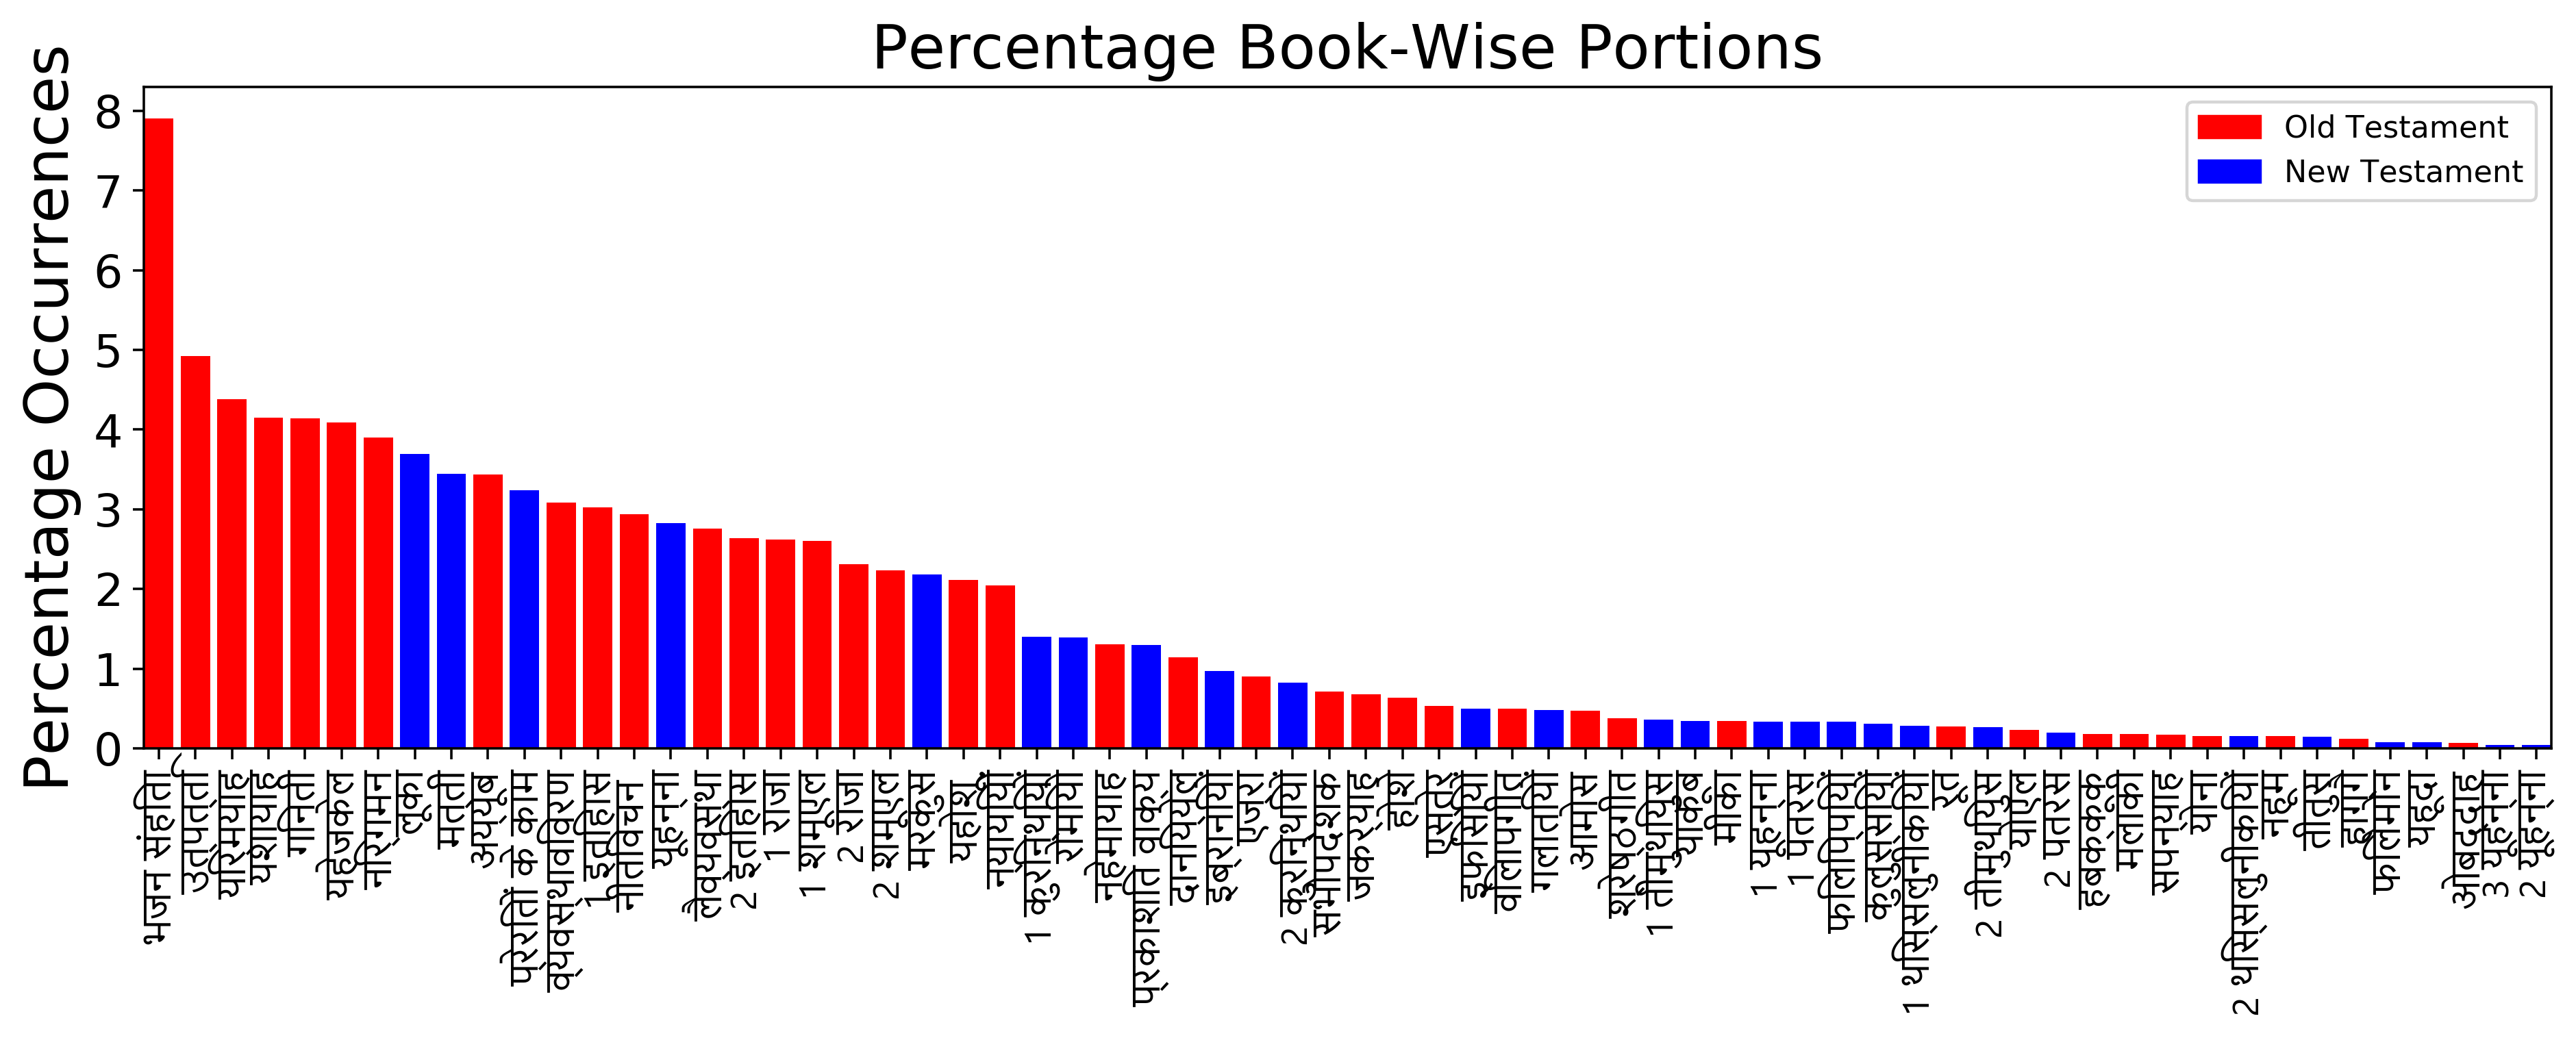

In [7]:
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
hindi_font = FontProperties(fname = "/kaggle/input/hindi-bible/Nirmala.ttf")
colors = {0:'r', 1:'blue'}
red_patch = mpatches.Patch(color='r', label='Old Testament')
blue_patch = mpatches.Patch(color='blue', label='New Testament')
# plt.grid()
plt.bar(df.index, df["% occurrences"], align='center', color=df['Testament'].apply(lambda x: colors[x]))
plt.xticks(df.index, color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.ylabel('Percentage Occurrences',fontsize = 20)
plt.title('Percentage Book-Wise Portions',fontsize = 20)
plt.legend(handles=[red_patch,blue_patch])
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.5 # inch margin
s = maxsize/plt.gcf().dpi*55+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

In [8]:
df = pd.DataFrame(bib.groupby("Authors").size()/(len(bib))*100, columns=["% occurrences"])
df = df.sort_values("% occurrences",ascending=False)
df.head()

,% occurrences
Authors,
unknown,21.969088
Moses,18.858649
Luke,6.934224
Ezra,6.567912
Paul,6.532566


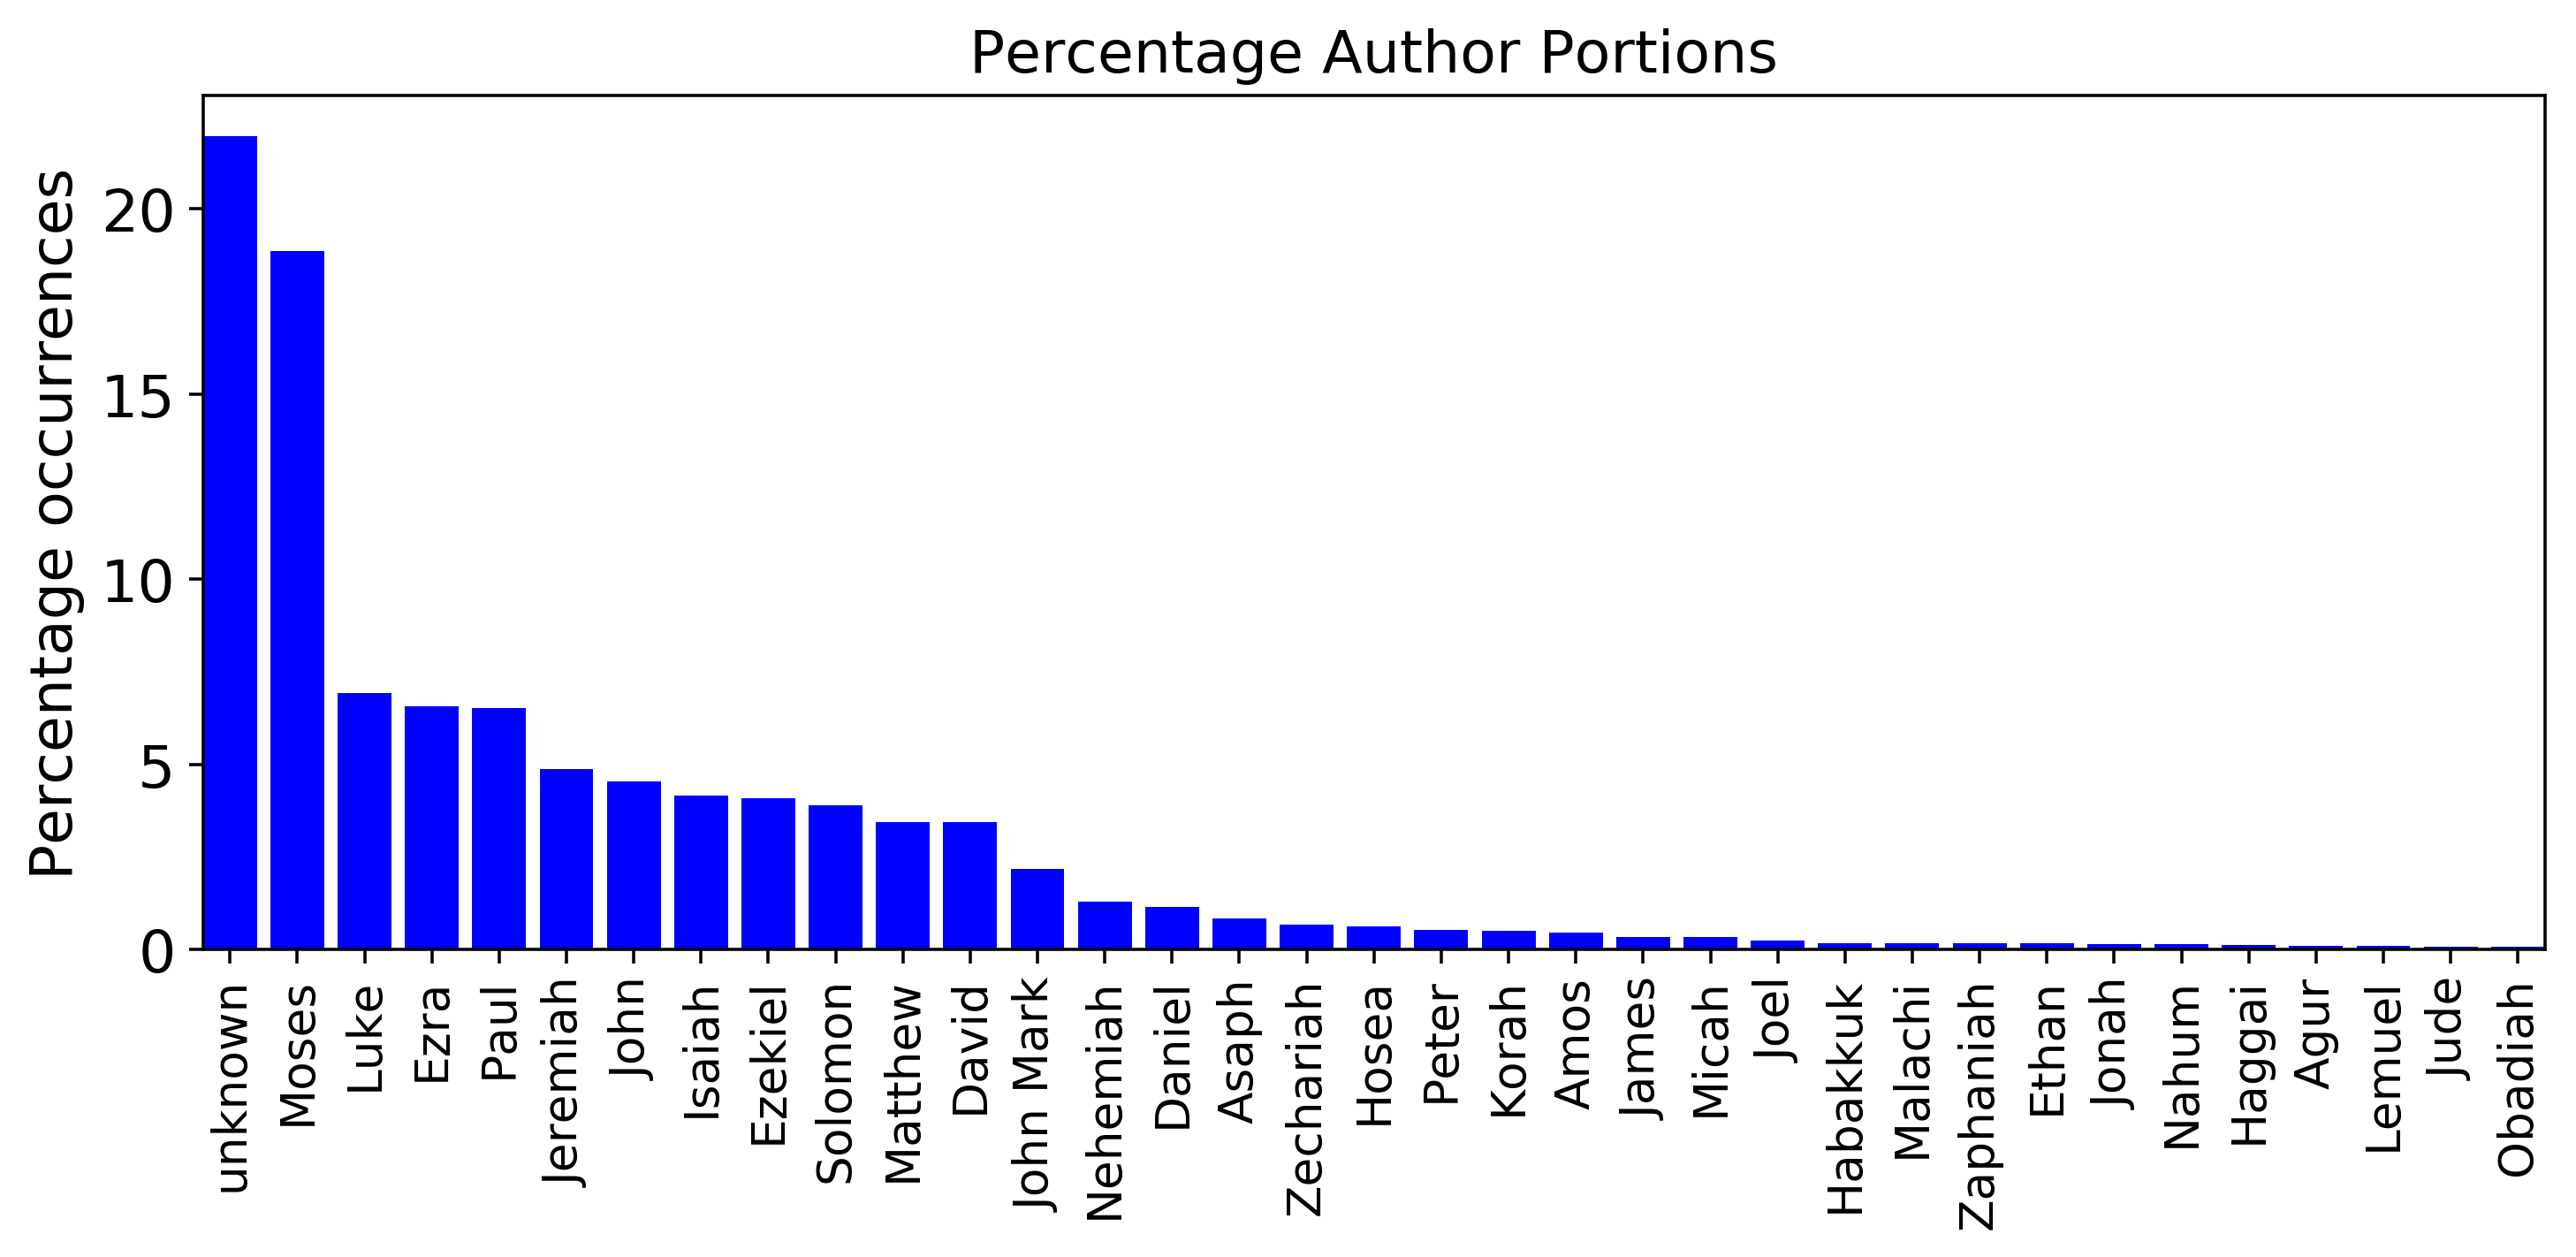

In [9]:
plt.bar(df.index, df["% occurrences"], align='center', color='blue')
plt.xticks(df.index, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.ylabel('Percentage occurrences',fontsize = 15)
plt.title('Percentage Author Portions',fontsize = 15);
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.5 # inch margin
s = maxsize/plt.gcf().dpi*55+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

In [10]:
set(bib[bib["Authors"]=="unknown"]["Book Name"])

{'1 राजा',
 '1 शमूएल',
 '2 राजा',
 '2 शमूएल',
 'अय्यूब',
 'इब्रानियों',
 'एस्तेर',
 'न्यायियों',
 'भजन संहिता',
 'यहोशू ',
 'रूत'}

### A Separate look on the authorship of Old Testament and New Testament books

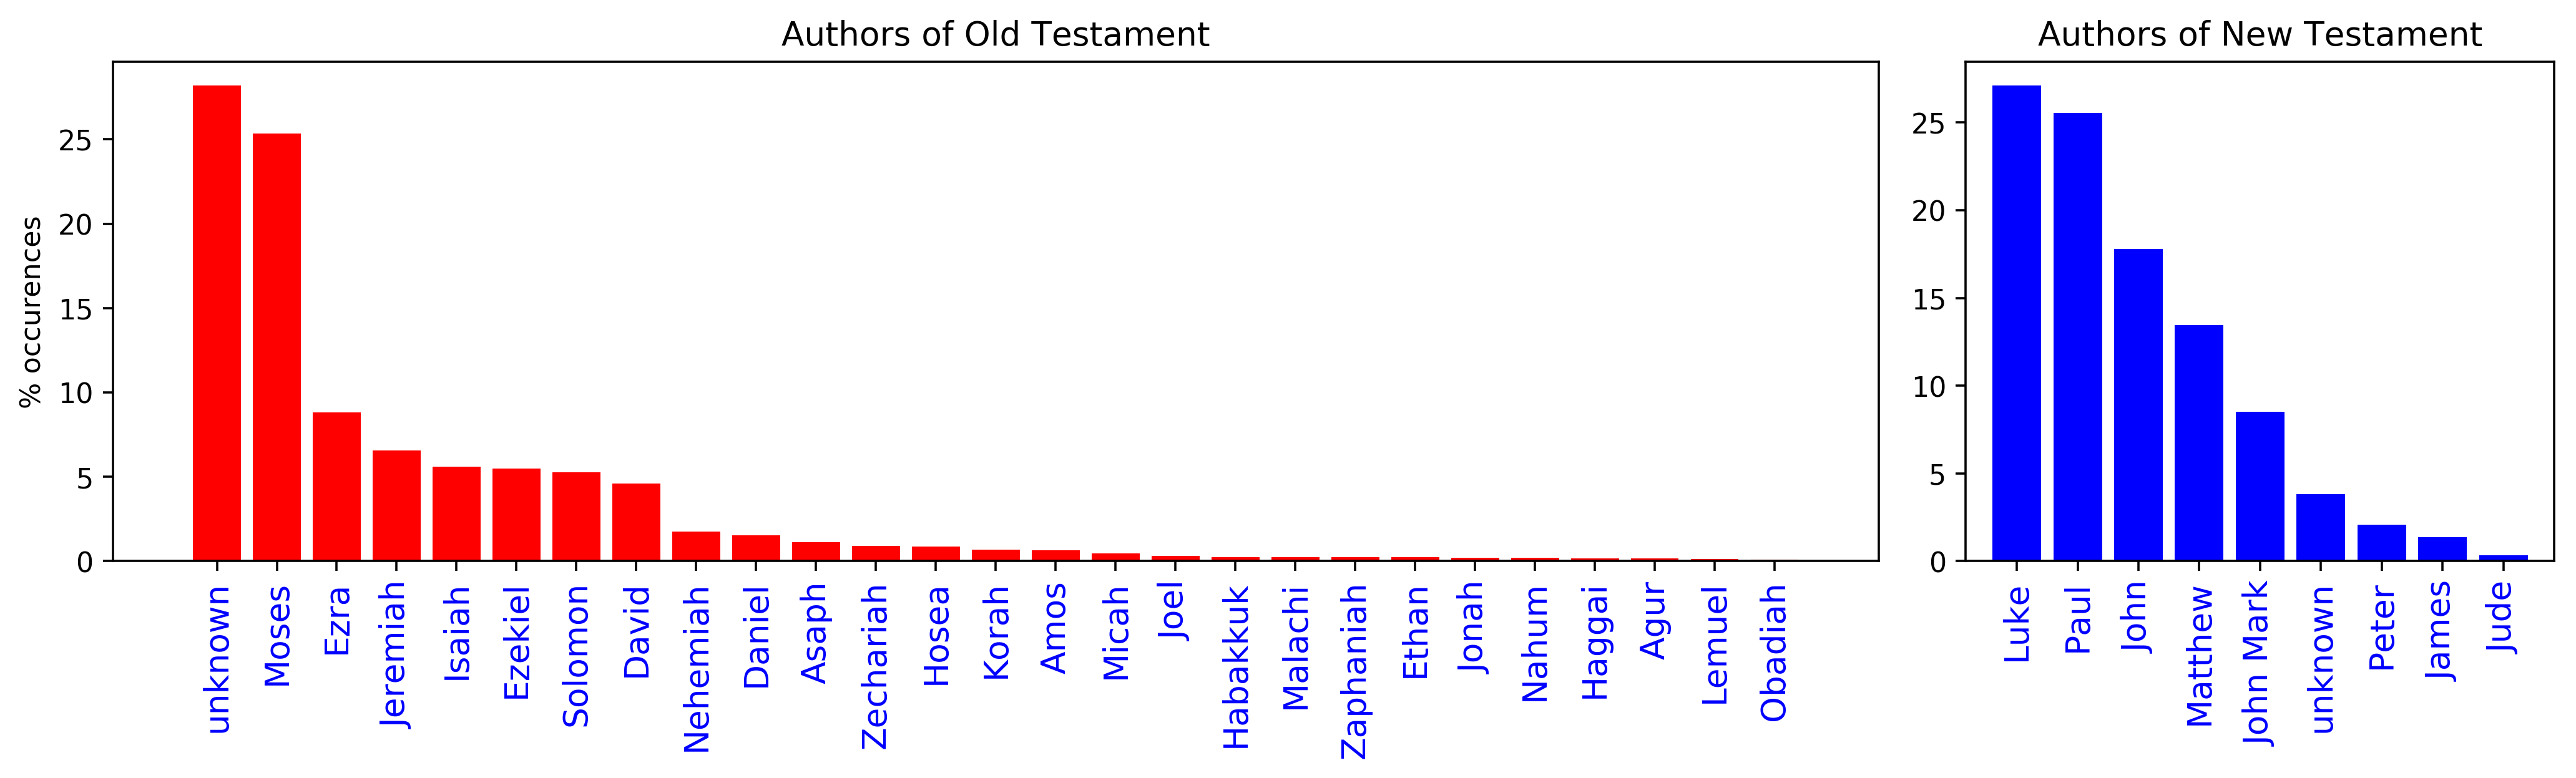

In [11]:
df_O = pd.DataFrame(bib[bib['Testament Code']==0].groupby("Authors").size()/(len(bib[bib['Testament Code']==0]))*100, columns=["% occurrences"])
df_O = df_O.sort_values("% occurrences",ascending=False)
df_N = pd.DataFrame(bib[bib['Testament Code']==1].groupby("Authors").size()/(len(bib[bib['Testament Code']==1]))*100, columns=["% occurrences"])
df_N = df_N.sort_values("% occurrences",ascending=False)

f, axes = plt.subplots(1, 2,figsize=(13,4), gridspec_kw={'width_ratios': [3, 1]})
axes[0].bar(df_O.index, df_O["% occurrences"], align='center', color='r')
plt.sca(axes[0])
plt.xticks(df_O.index, color="b", rotation=90, fontsize = 12)
plt.title('Authors of Old Testament')
plt.ylabel('% occurences')

axes[1].bar(df_N.index, df_N["% occurrences"], align='center', color='b')
plt.sca(axes[1])
plt.xticks(df_N.index, color="b", rotation=90, fontsize = 12)
plt.title('Authors of New Testament')
plt.tight_layout();

It can be easily seen here that relatively recent New Testament Books have lesser unknown writers (4%) as compared to the Old Testament (28%). <br>
We get an interesting finding here that to the contrary of popular belief, it is not Paul who has written most of the new testament but it is Luke. Sure, Paul has written more books but volume-wise(no. of verses), It is Luke who gave maximum contribution. [Original manuscripts](https://apologika.blogspot.com/2014/05/who-wrote-most-of-new-testament.html) also support this fact.

## Starting Text Analysis
**Stopwords** are generally the most common words in a language and for our purpose of analysis, they have to be eliminated from the text. `Hindi_StopWords.txt` is a custom made list of 270 stopwords.

In [12]:
with open("/kaggle/input/hindi-bible/Hindi_StopWords.txt",encoding='utf-8') as f:
    stopword= f.read().strip('\ufeff')
stopword = stopword.split(", ")
stopword = [i.strip("'") for i in stopword]
print(stopword)

['अर्थात', 'कुछ', 'तेरी', 'साबुत', 'अपनि', 'हूं', 'काफि', 'यिह', 'जा', 'दे', 'देकर', 'रह', 'कह', 'कहा', "बात' ", 'जिन्हों', 'किर', 'कोई', 'हे', 'कोन', 'रहा', 'सब', 'सो', 'तक', 'इंहें', 'इसकि', 'अपनी', 'दबारा', 'सभि', 'होते', 'भीतर', 'निचे', 'घर', 'उन्हें', 'उन्ह', 'मेरे', 'था', 'व', 'इसमें', 'उसी', 'बिलकुल', 'होति', 'गया', 'सकता', 'अपना', 'लिये', 'उसका', 'पर', 'दवारा', 'गए', 'है', 'कितना', 'भि', 'लिए', 'वुह ', 'ना', 'किसि', 'परन्तु', 'किन्हें', 'बहुत', 'भी', 'तुम्हारे', 'निहायत', 'उन्हीं', 'वहिं', 'हैं', 'उन्हों', "इतयादि' ,'यहाँ", 'तब', 'पूरा', 'क्योंकि', 'कौनसा', 'आप', 'हुअ', 'ऐसे', 'एस', 'कारण', 'अप', 'पहले', 'तुम', 'जेसा', 'तिस', 'लेकिन', 'कहते', 'मगर', 'करता', 'संग', 'सभी', 'जीधर', 'किंहों', 'हि', 'द्वारा', 'हुआ', 'तू', 'जिंहें', 'उसने', 'पास', 'वहां', 'वह', 'किंहें', 'इंहों', 'मुझ', 'कुल', 'तिंहों', 'का', 'मेरी', 'तेरे', 'उनके', 'क्या', 'जहाँ', 'काफ़ी', 'वर्ग', 'वरग', 'बही', 'ये', 'जिस', 'इसि', 'हुई', 'साम्हने', 'नहिं', 'जैसे', 'वहीं', 'दिया', 'अभी', 'यहि', 'वग़ैरह', 'उनकि', 'न',

# WordCloud
We are using `Full_text_Bible.txt` which is a compilation of whole Hindi text of the Bible to make the WordCloud.  

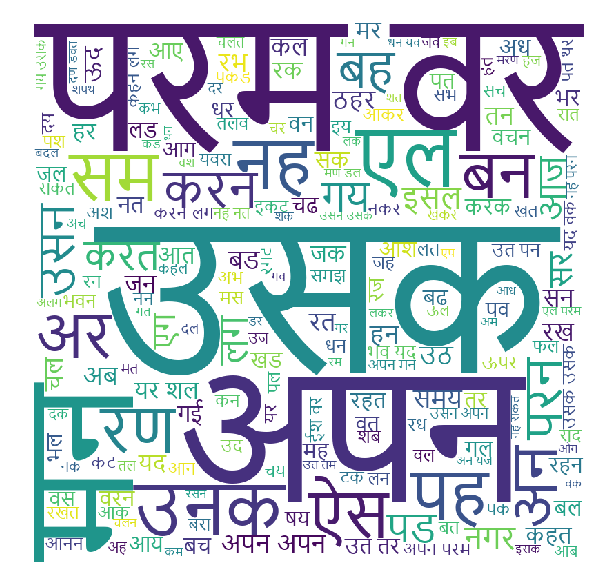

In [13]:
with open("/kaggle/input/hindi-bible/Full_text_Bible.txt", mode='r', encoding='utf-8-sig') as f:
    text= f.read()
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
%matplotlib inline
stopwords = set(stopword)
wordcloud = WordCloud(font_path="/kaggle/input/hindi-bible/Nirmala.ttf",width = 800, height = 800, 
background_color ='white', 
stopwords = stopwords, 
min_font_size = 10).generate(text) 

# plot the WordCloud image 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 

plt.show()

*Though WordCloud messes up with Matras of Hindi Words and the WordCloud function doesn't do well to remove stopwords but still we can see that words like परमेश्वर,मन etc. are more prominent than others. <br>Next, we'll do stemming.*

**Stemming** is the process of reducing words to their word base or root form. E.g., in English, stem word for playing, player, played etc. will be "play". This below functionality to generating Hindi stem words has been taken from [here](https://github.com/taranjeet/hindi-tokenizer/blob/master/HindiTokenizer.py). We'll use stemming to accurately arrive on most frequent words in Hindi Bible so that our program won't count words like लोग and लोगों as two different words.

In [14]:
def generate_stem_words(word):
    suffixes = {
    2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"नी",u"ना",u"ते",u"ती",u"ाँ",u"ां",u"ों",u"ें"],
    3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],    4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
    5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
}
    for L in 5, 4, 3, 2:
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

### Most frequent words in Hindi Bible

{'यहोवा': 6260, 'परमेश्वर': 3788, 'लोग': 3262, 'पुत्र': 2443, 'देश': 2401, 'राजा': 2383, 'दिन': 2308, 'बात': 2144, 'हाथ': 1774, 'इस्राएल': 1757, 'मनुष्य': 1691, 'नाम': 1653, 'काम': 1645, 'नगर': 1320, 'मन': 1143, 'सुन': 1124, 'समय': 1070, 'वचन': 1062, 'प्रभु': 1047, 'देख': 1040}


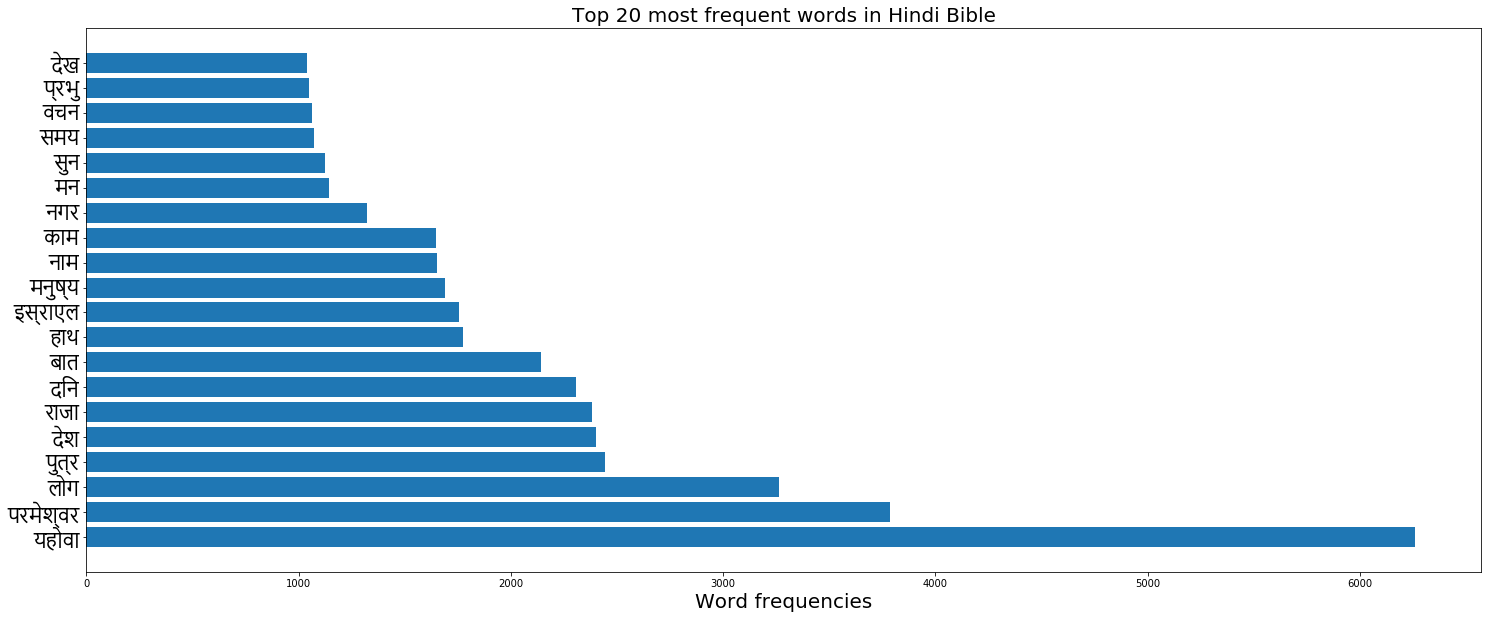

In [15]:
import collections
wordcount = {}
# To eliminate duplicates, we will split by punctuation, and use case demiliters.
for word in text.split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace(";","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = generate_stem_words(word)
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# most common word
word_counter = collections.Counter(wordcount)
freq_word={}
for word, count in word_counter.most_common(20):
    freq_word[word]=count
print(freq_word)
freq_df=pd.DataFrame(list(freq_word.items()), index=range(20), columns=['word', 'freq']) 
fig, ax = plt.subplots(figsize=(25,10))
ax.barh(freq_df['word'], freq_df['freq'], align='center')
ax.set_xlabel('Word frequencies', fontsize = 20)
ax.set_title('Top 20 most frequent words in Hindi Bible', fontsize = 20)
plt.yticks(range(len(freq_word.keys())),list(freq_word.keys()), fontproperties=hindi_font, fontsize = 20);

## Abstract Extraction by significance score
Let’s further prepare the input text from our corpus for further processing, by removing punctuation and stopwords (custom made list). In this section, we'll try to find most significant verses in Hindi Bible.<br>
#### A simple word-frequency finder
We have to find the frequency of each word also to derive significance. While we are at it, It will be useful to have a function which can find the frequency of any word we search for. Our function `freq_finder` does the same, there are examples given below for words: प्रेम (Love) and डर (Fear).
> This is specific to HHBD version only.

In [16]:
from string import punctuation
from nltk.probability import FreqDist
tokens = word_tokenize(text)
customStopWords = set(list(stopwords) + list(punctuation+'।'+'॥'))
wordsWOstopwords = [word for word in tokens if word not in customStopWords]
#removing numeric digits from list of words
wordsWOstopwords = [i for i in wordsWOstopwords if not i.isdigit()]
freq = FreqDist(wordsWOstopwords)

def freq_finder(word):
    """
    Input any Hindi word it will return how many times it appears in HHBD version of Bible.
    """
    return freq[word]
print("प्रेम appears for {} times while डर appears for {} times in HHBD Hindi Bible.".format(freq_finder('प्रेम'),freq_finder('डर')))

प्रेम appears for 350 times while डर appears for 199 times in HHBD Hindi Bible.


In [17]:
print(wordsWOstopwords[:10])
corpus = wordsWOstopwords

['परमेश्वर', 'आकाश', 'पृथ्वी', 'सृष्टि', 'की।और', 'पृथ्वी', 'बेडौल', 'सुनसान', 'पड़ी', 'गहरे']


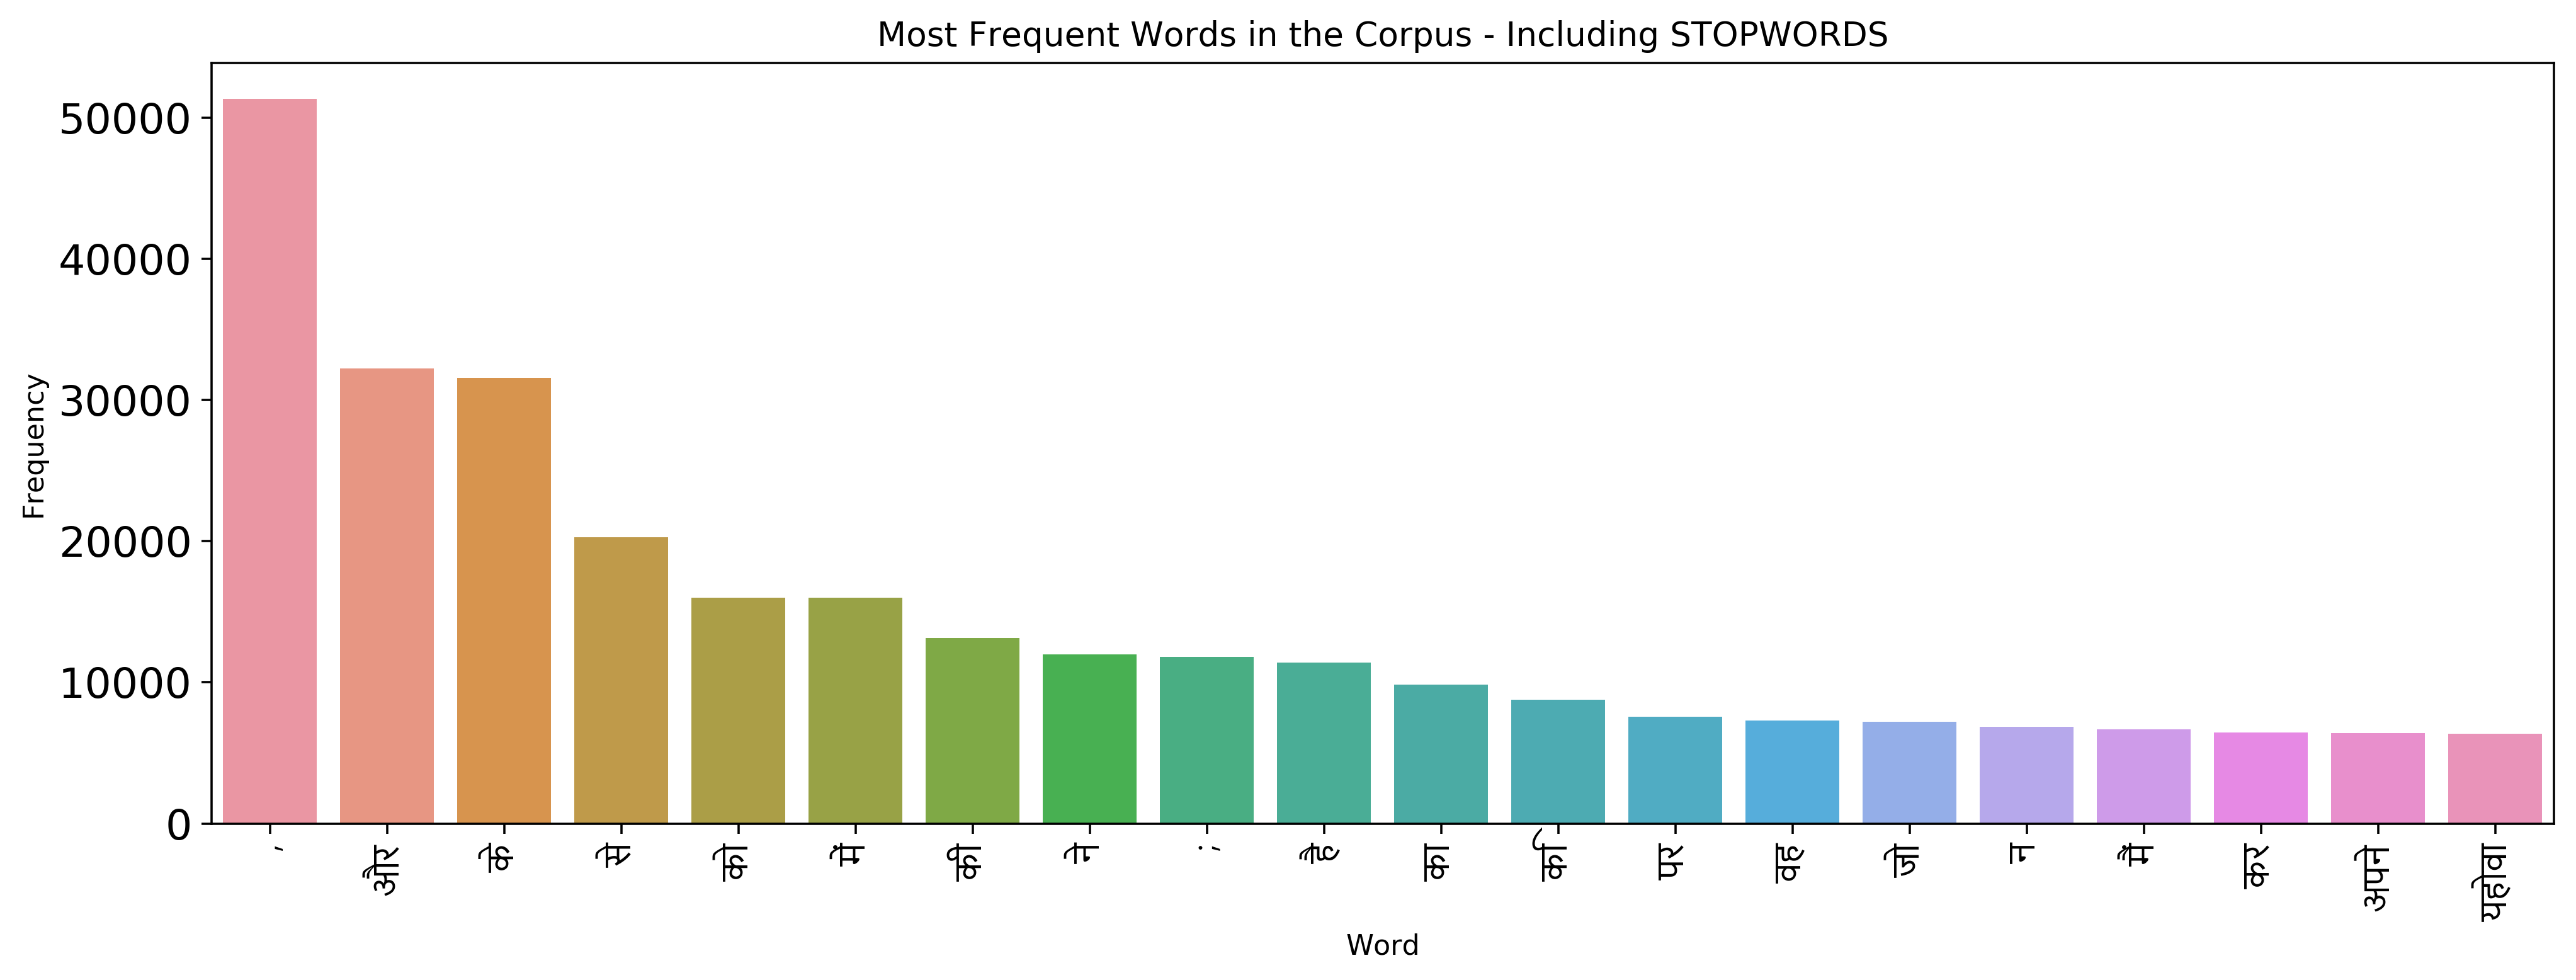

In [18]:
title = "Most Frequent Words in the Corpus - Including STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(tokens)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=320)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

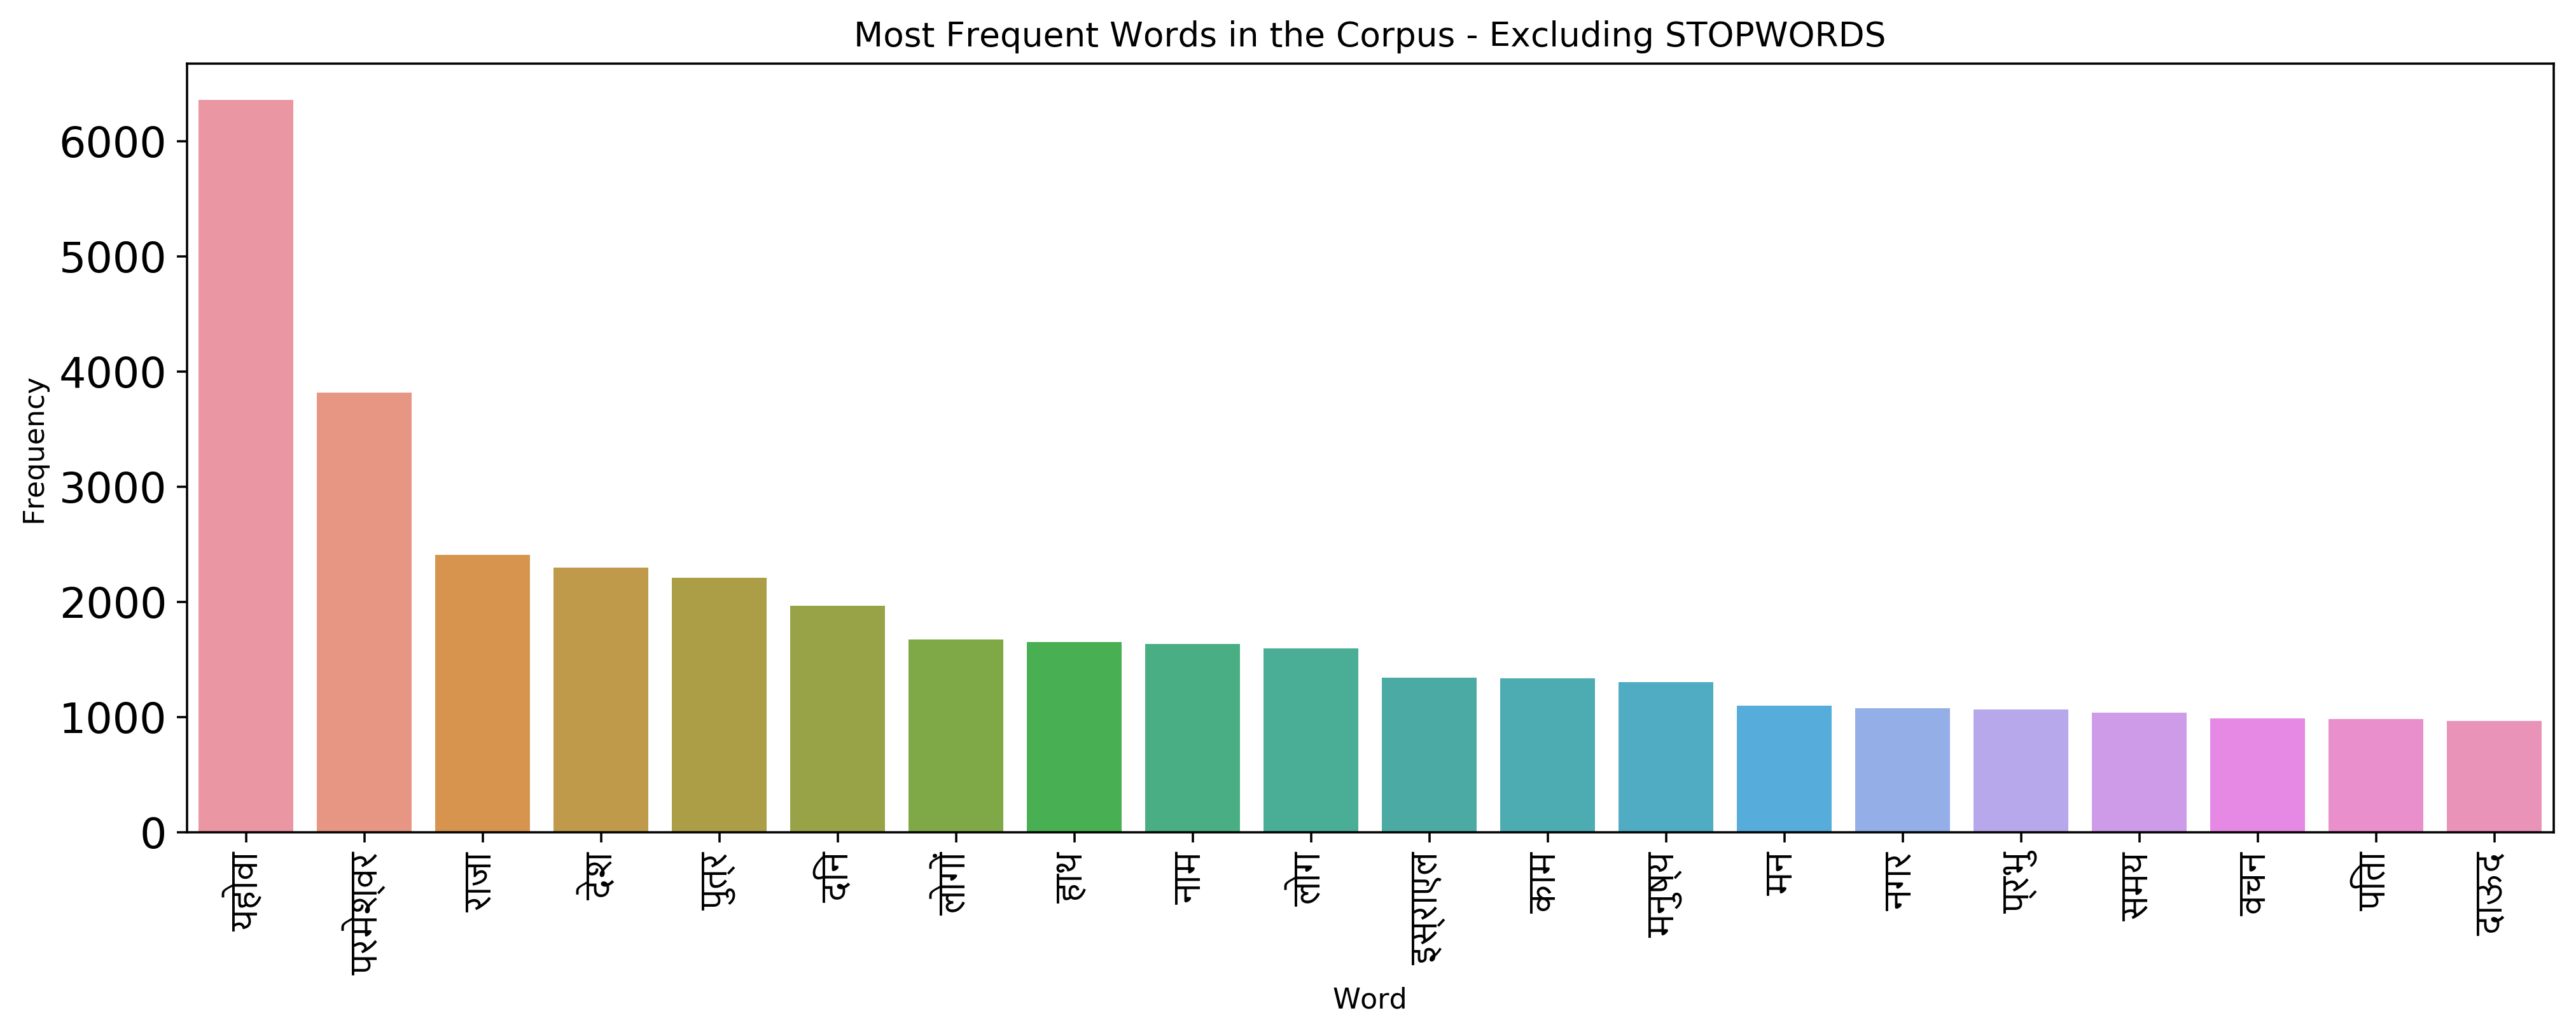

In [19]:
title = "Most Frequent Words in the Corpus - Excluding STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(corpus)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=320)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

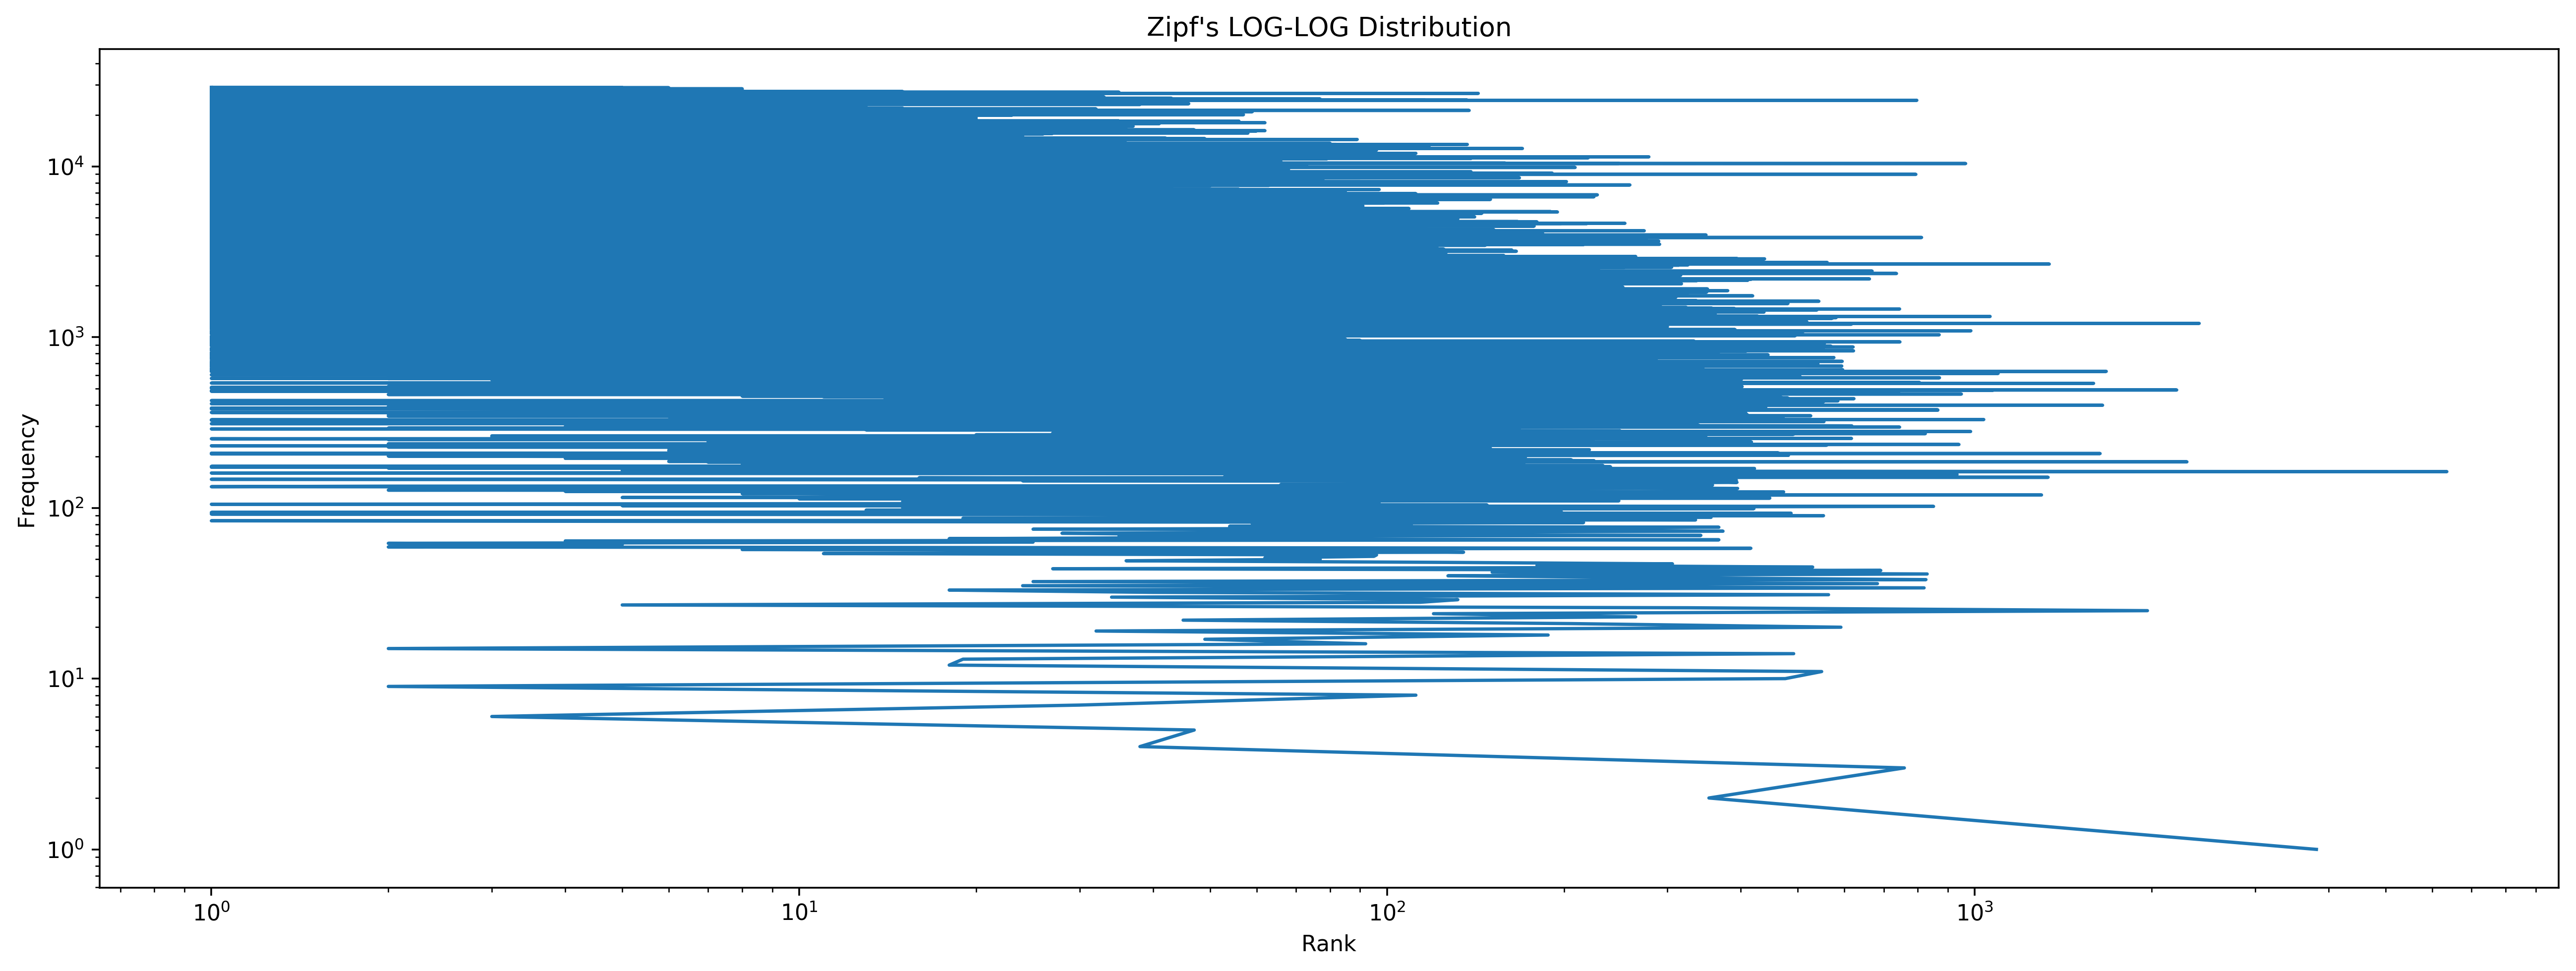

In [20]:
fd=FreqDist()
    
#Creating ranks and frequencies
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])
        
#Plotting the LOG-LOG distribution
plt.figure(figsize=(20,7), dpi=320)
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's LOG-LOG Distribution")
plt.show()

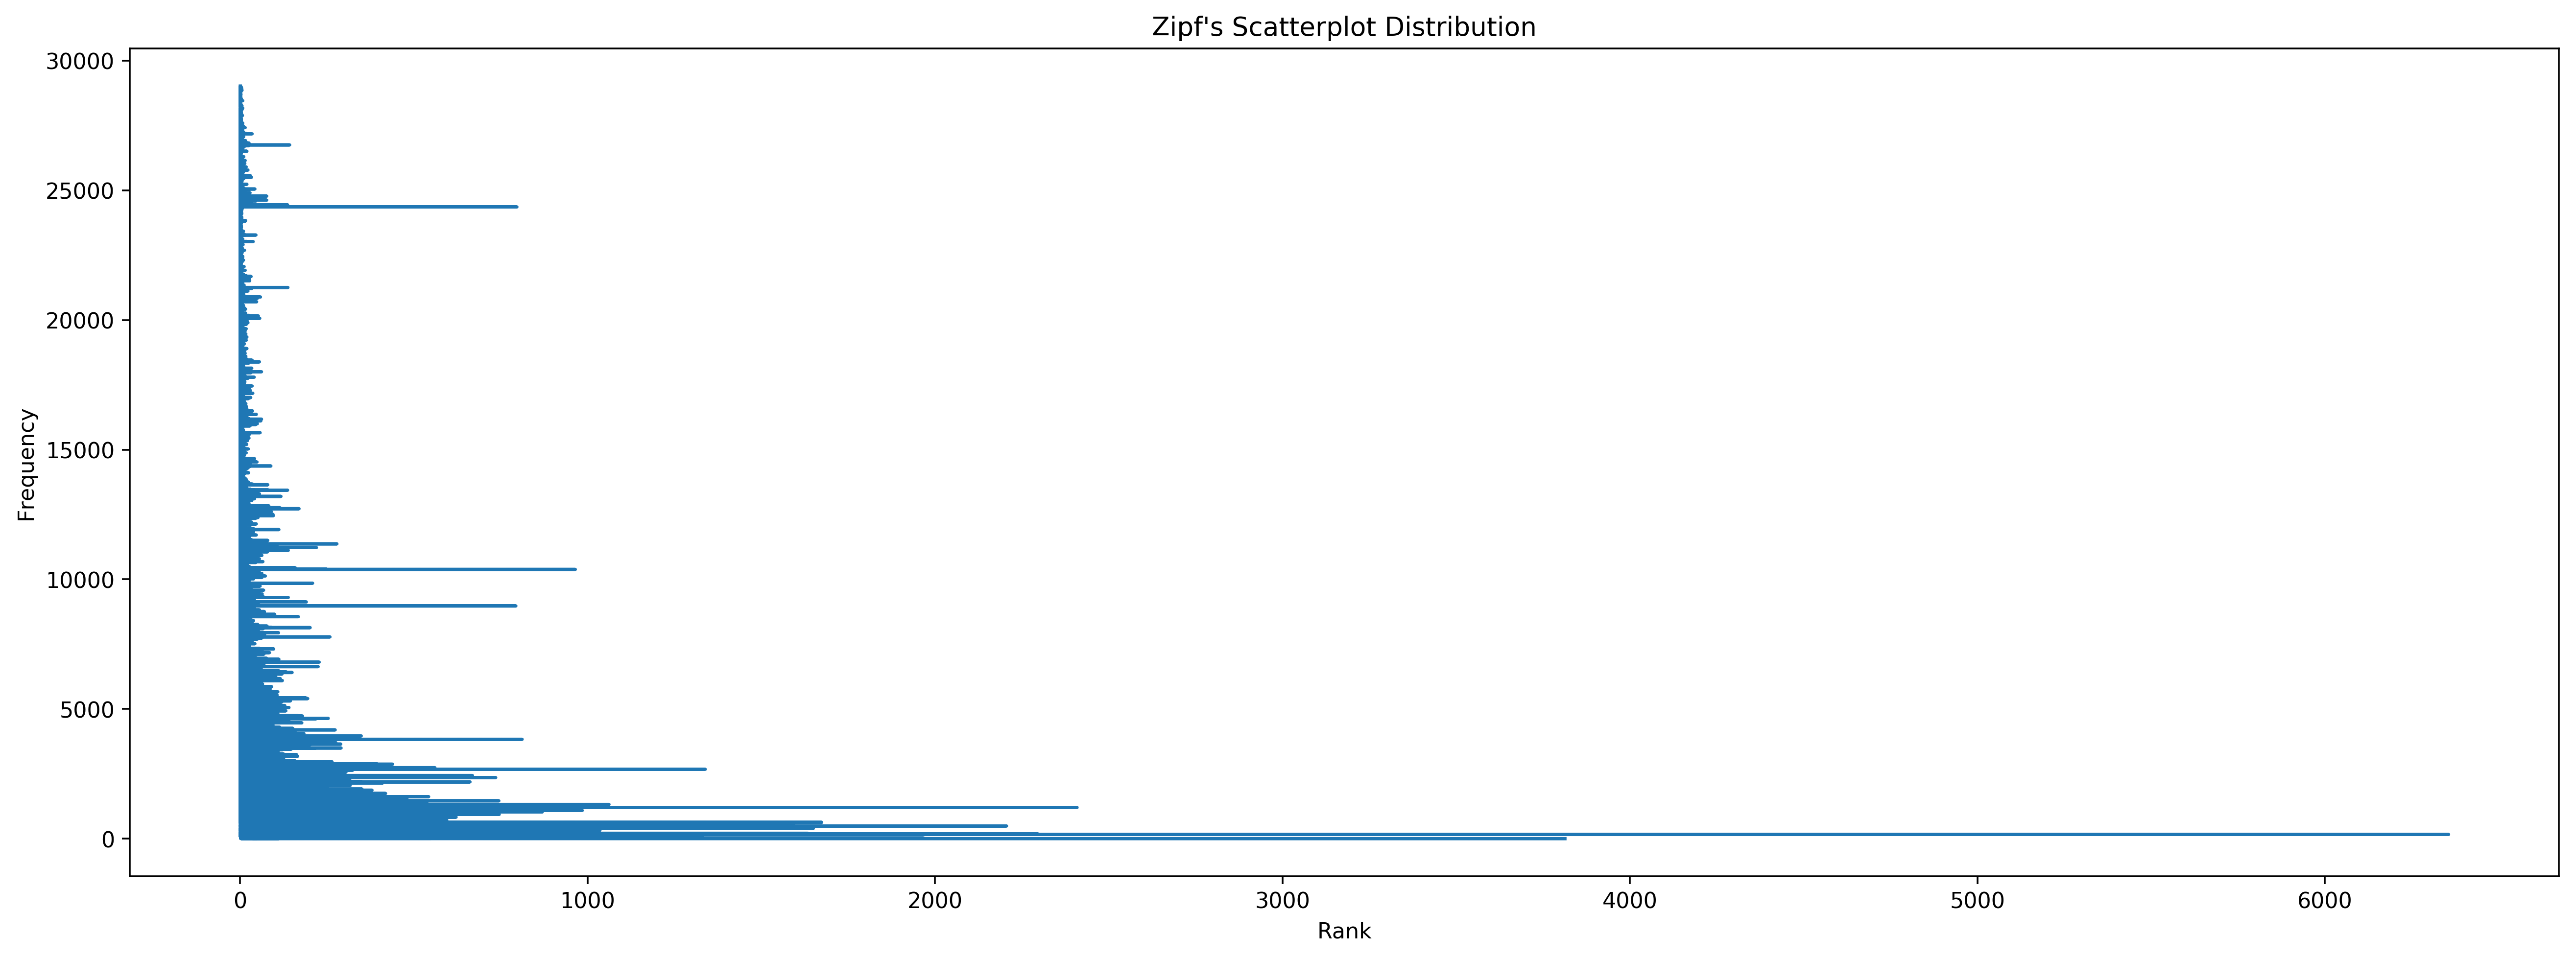

In [21]:
#Plotting the Scatterplot distribution
plt.figure(figsize=(20,7), dpi=320)
plt.plot(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Scatterplot Distribution")
plt.show()

Heaps Law


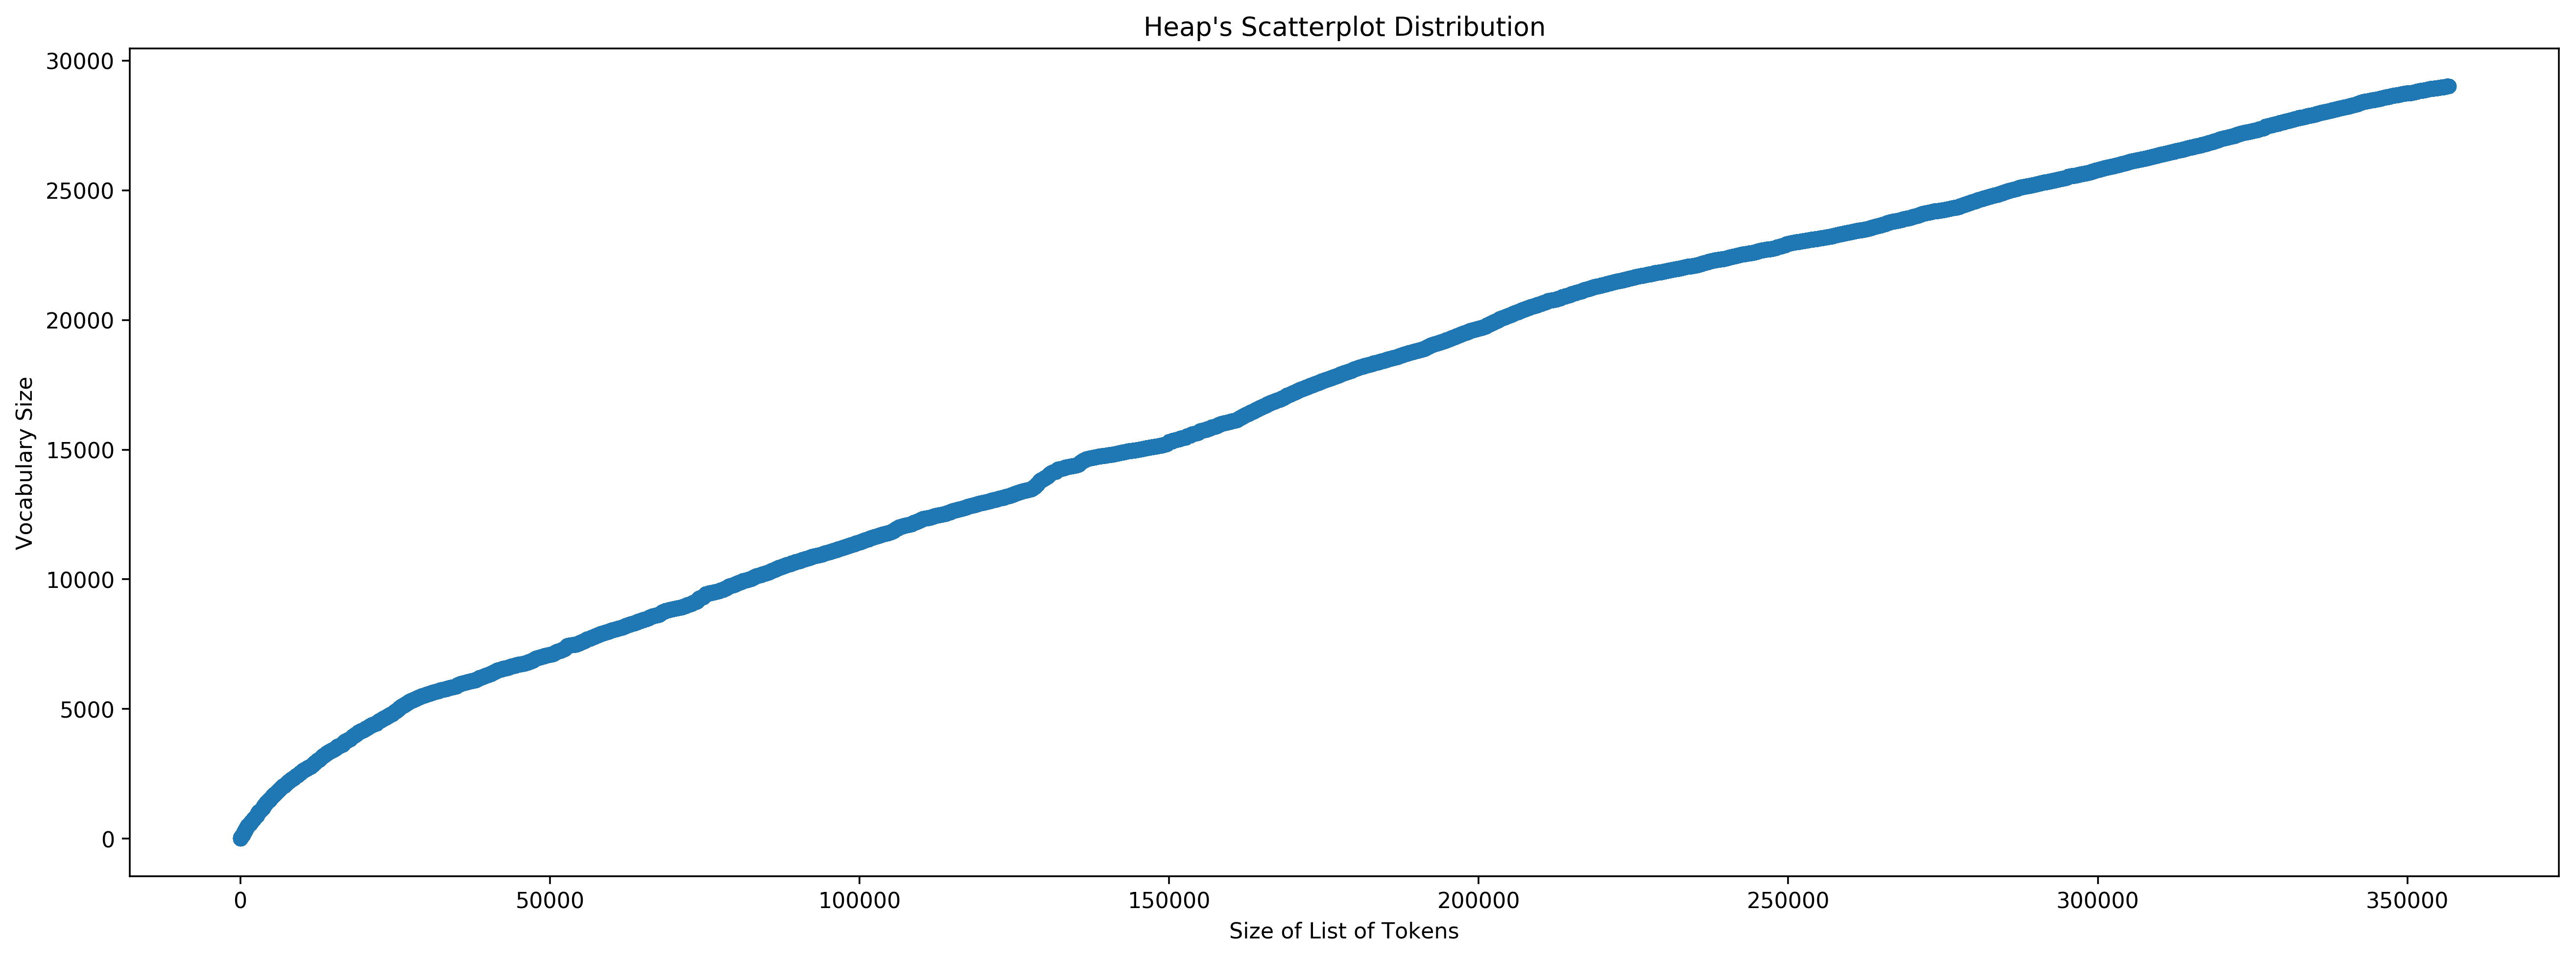

In [22]:
'''Heaps Law'''
    
print("Heaps Law")
    
uniq = set()
    
Tn = []
V = []
    
for i, token in enumerate(corpus):
    uniq.add(token)
    Tn.append(i)   #Tn: Tokens
    V.append(len(uniq))   #Vocab
    #print(i, len(uniq))
        
#Plotting the Scatterplot distribution for Heap's Law
plt.figure(figsize=(20,7), dpi=320)
plt.scatter(Tn,V)
plt.xlabel('Size of List of Tokens')
plt.ylabel('Vocabulary Size')
plt.title("Heap's Scatterplot Distribution")
plt.show()

# **CURVE FITTING**

1. **HEAPS LAW**

In [23]:
from scipy.optimize import curve_fit
import math

def heaps(T, k, b):
    return k*np.power(T,b)

# Fit the HEAPS Curve
pars, cov = curve_fit(f=heaps, xdata=Tn, ydata=V, p0=[0, 0], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = V - heaps(Tn, *pars)

print(*pars, stdevs)

2.9935411069293973 0.7187992905968196 [2.43635529e-03 6.57350291e-05]


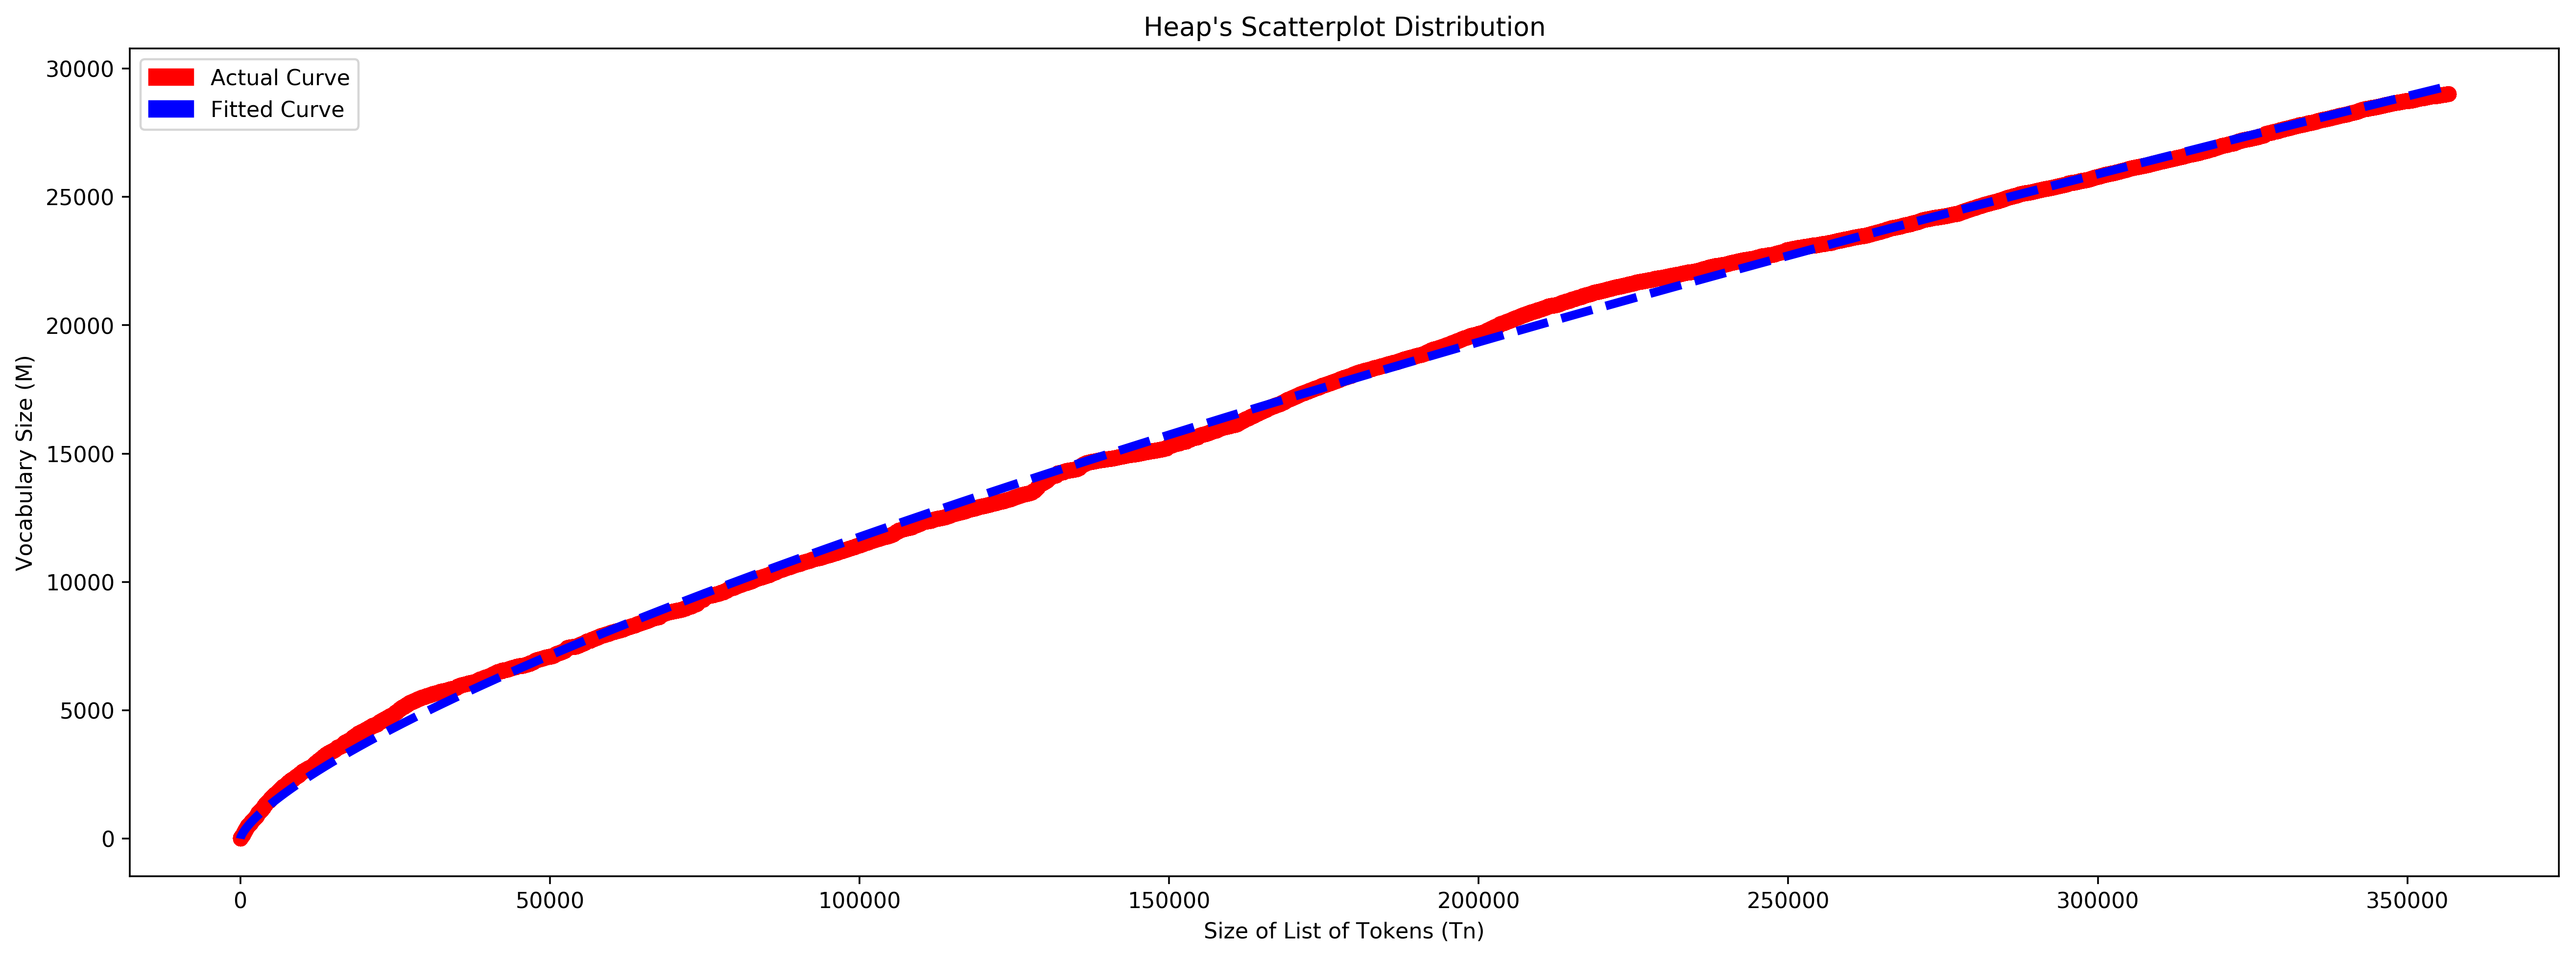

In [24]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20,7), dpi=320)
ax = fig.add_subplot(111)
red_patch = mpatches.Patch(color='r', label='Actual Curve')
blue_patch = mpatches.Patch(color='blue', label='Fitted Curve')
plt.scatter(Tn,V, color='red')
plt.xlabel('Size of List of Tokens (Tn)')
plt.ylabel('Vocabulary Size (M)')
plt.title("Heap's Scatterplot Distribution")
plt.legend(handles=[red_patch,blue_patch])
ax.plot(Tn, heaps(Tn, *pars), linestyle='--', linewidth=4, color='blue')
plt.show()